In [8]:
import pandas as pd
import seaborn as sns

In [9]:
df = pd.read_csv(r"C:\Users\adana\Downloads\sales_dataset_raw.csv")
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,30/12/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,29/12/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,22/12/2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,18/12/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [10]:
#After exploring the first few rows of the dataset, I found that the 'Unnamed: 0' column is just a repetition of the existing index in the DataFrame. 
#So dropped it.
df.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
# Renaming columns to standardize naming conventions:
# - Replaces spaces with underscores to improve readability and ensure consistency.
# - Converts all column names to lowercase for uniformity and to follow Python's best practices.
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [12]:
df['sales'].isna().sum()

0

In [13]:
df.dtypes

order_id              int64
product              object
quantity_ordered      int64
price_each          float64
order_date           object
purchase_address     object
month                 int64
sales               float64
city                 object
hour                  int64
dtype: object

In [14]:
# Convert the 'order_date' column from string format to a datetime object. 
# Setting dayfirst=True ensures that dates are parsed correctly when the day appears before the month.
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

# Extract the year and day from the 'order_date' column.
# This helps in further time-based analysis, such as yearly or daily trends.
df['year'] = df['order_date'].dt.year  
df['day'] = df['order_date'].dt.day    
df['month']=df['order_date'].dt.month
df['weekday'] = df['order_date'].dt.weekday


# Define a mapping dictionary to convert numerical month values (1 to 12) into their respective month names.
mon_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Map the numerical month values in the 'month' column to their corresponding month names.
# This creates a new column 'month_name' to make the data more readable and useful for analysis.
df['month_name'] = df['month'].map(mon_map)


In [15]:
# It maps the 'city' column, replacing ' New York City' with 'New York' (removing trailing spaces),
# and ensures that other cities' names are cleaned by removing any extra leading/trailing spaces. 
# This ensures consistency in city names across the dataset.
print('Before Data Cleaning: ',df['city'].unique())
city_map = {
    ' New York City': 'New York',
    ' San Francisco': 'San Francisco',
    ' Atlanta': 'Atlanta',
    ' Portland': 'Portland',
    ' Dallas': 'Dallas',
    ' Los Angeles': 'Los Angeles',
    ' Boston': 'Boston',
    ' Austin': 'Austin',
    ' Seattle': 'Seattle'
}
df['city'] = df['city'].map(city_map)
print('Before Data Cleaning: ',df['city'].unique())


Before Data Cleaning:  [' New York City' ' San Francisco' ' Atlanta' ' Portland' ' Dallas'
 ' Los Angeles' ' Boston' ' Austin' ' Seattle']
Before Data Cleaning:  ['New York' 'San Francisco' 'Atlanta' 'Portland' 'Dallas' 'Los Angeles'
 'Boston' 'Austin' 'Seattle']


In [16]:
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,year,day,weekday,month_name
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York,0,2019,30,0,December
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York,7,2019,29,6,December
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York,18,2019,12,3,December
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019,22,6,December
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019,18,2,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,2019,7,4,June
185946,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York,19,2019,1,5,June
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,2019,22,5,June
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,2019,26,2,June


In [17]:
# The dataset has been checked for missing values (NA) using the `isna().sum()` method.
# The result shows that all columns are free from missing data, as indicated by a sum of 0 for each column.
# This ensures that the dataset is complete and ready for further analysis or processing without any gaps in the data.df.isna().sum()

df.isna().sum()

order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
month               0
sales               0
city                0
hour                0
year                0
day                 0
weekday             0
month_name          0
dtype: int64

In [18]:
# The `duplicated().sum()` method was used to identify duplicate rows in the dataset.
# The result of 234 indicates that there are 234 duplicate rows in the dataset.df.duplicated().sum()

df.duplicated().sum()

264

In [19]:
#Removed these duplicates using `drop_duplicates()` to ensure data integrity.
df = df.drop_duplicates()

In [20]:
# Using df.describe() to generate summary statistics for the numerical columns in the DataFrame.
df.describe()

,order_id,quantity_ordered,price_each,order_date,month,sales,hour,year,day,weekday
count,185686.000000,185686.000000,185686.000000,185686,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000
mean,230411.376227,1.124544,184.519255,2019-07-18 21:32:06.298051328,7.058653,185.611936,14.412934,2019.000183,15.758662,2.991588
min,141234.000000,1.000000,2.990000,2019-01-01 03:07:00,1.000000,2.990000,0.000000,2019.000000,1.000000,0.000000
25%,185833.250000,1.000000,11.950000,2019-04-16 20:55:15,4.000000,11.950000,11.000000,2019.000000,8.000000,1.000000
50%,230354.500000,1.000000,14.950000,2019-07-17 20:11:00,7.000000,14.950000,15.000000,2019.000000,16.000000,3.000000
75%,275028.750000,1.000000,150.000000,2019-10-26 08:00:00,10.000000,150.000000,19.000000,2019.000000,23.000000,5.000000
max,319670.000000,9.000000,1700.000000,2020-01-01 05:13:00,12.000000,3400.000000,23.000000,2020.000000,31.000000,6.000000
std,51511.717183,0.443069,332.843838,NaN,3.502932,333.032118,5.423329,0.013530,8.782064,2.002009


In [21]:
# Identifying and capping outliers using the IQR method for data consistency.  
numeric_cols= ['quantity_ordered', 'price_each', 'sales']
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR= Q3 - Q1
    
    lower_bound= Q1 - 1.5*IQR
    upper_bound= Q3 + 1.5*IQR

outlier = df[(df[col]< lower_bound) | (df[col]> upper_bound)]

df.loc[df[col] < lower_bound, col] = lower_bound
df.loc[df[col] > upper_bound, col] = upper_bound


In [22]:
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,year,day,weekday,month_name
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,357.075,New York,0,2019,30,0,December
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,357.075,New York,7,2019,29,6,December
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.950,New York,18,2019,12,3,December
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.990,San Francisco,15,2019,22,6,December
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.950,Atlanta,12,2019,18,2,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.990,Boston,19,2019,7,4,June
185946,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.990,New York,19,2019,1,5,June
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.950,San Francisco,18,2019,22,5,June
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.950,San Francisco,18,2019,26,2,June


# Product Performance Analysis: Breakdown of Sales by Product

## Can you provide a breakdown of total sales for each product? Which products are generating the highest revenue?

In [25]:
prod_sales = df.groupby('product')['sales'].sum().reset_index()
prod_sales_sorted = prod_sales.sort_values(by='sales', ascending=False, ignore_index=True)
print(prod_sales_sorted)

                       product        sales
0                       iPhone  2442393.000
1     Apple Airpods Headphones  2345457.075
2       27in 4K Gaming Monitor  2222791.875
3       34in Ultrawide Monitor  2204581.050
4                 Google Phone  1971768.150
5           Macbook Pro Laptop  1685751.075
6              ThinkPad Laptop  1473291.450
7                Flatscreen TV  1439284.425
8   Bose SoundSport Headphones  1342865.700
9             27in FHD Monitor  1131074.590
10             Vareebadd Phone   737359.875
11                20in Monitor   453818.740
12    Lightning Charging Cable   346376.550
13        USB-C Charging Cable   285975.450
14            Wired Headphones   246082.760
15          LG Washing Machine   237811.950
16                    LG Dryer   230670.450
17       AA Batteries (4-pack)   106041.600
18      AAA Batteries (4-pack)    92648.140


### Visualization

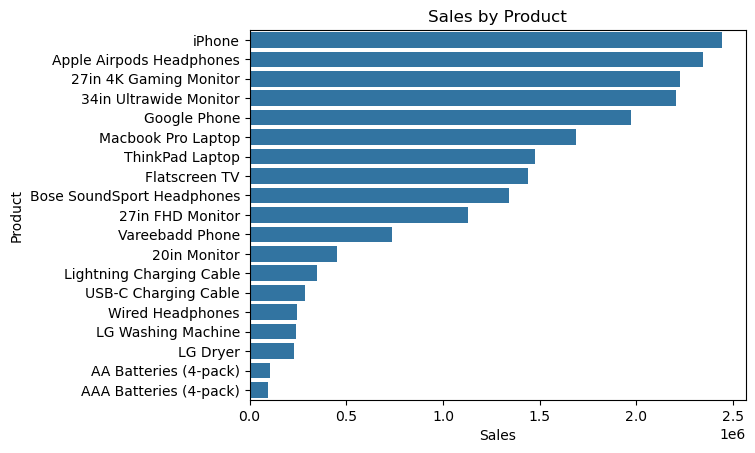

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='sales', y='product', data=prod_sales_sorted)
plt.title('Sales by Product')
plt.xlabel('Sales')
plt.ylabel('Product')
plt.show()

## Insights

#### Based on the total revenue, the top-performing product is iPhone.
#### On the other hand, the lowest-performing product is AAA Batteries (4-pack).

# Regional Sales Insights: Analyzing Sales Performance by City

## How do sales differ across various cities? Which city has the highest sales?

In [32]:
city_sales = df.groupby('city')['sales'].sum().reset_index()
city_sales_sorted = city_sales.sort_values(by='sales', ascending=False, ignore_index=True)
print(city_sales_sorted)

            city        sales
0  San Francisco  5025194.915
1    Los Angeles  3315191.935
2       New York  2830614.820
3         Boston  2244034.270
4        Atlanta  1694984.180
5        Seattle  1693903.140
6         Dallas  1682350.090
7       Portland  1401919.725
8         Austin  1107850.830


### Visualization

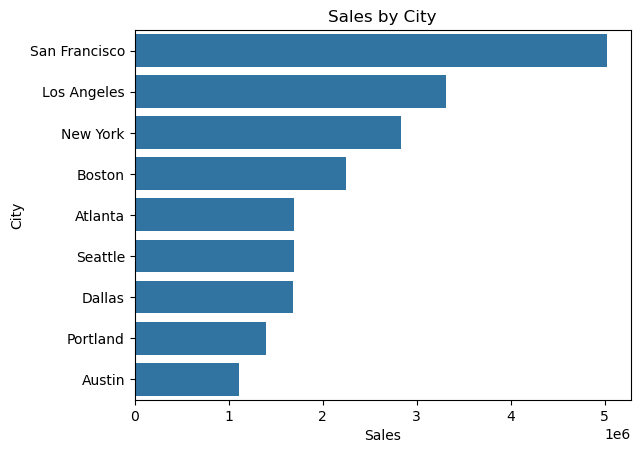

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='sales', y='city', data=city_sales_sorted)
plt.title('Sales by City')
plt.xlabel('Sales')
plt.ylabel('City')
plt.show()

## Insights
#### The city with the highest sales is San Francisco with a total sales value of 5025194.915.  
#### This suggests that San Francisco is a key market, likely due to factors such as higher population density, greater purchasing power, or the presence of tech companies that drive demand.


# Time Series Analysis: Sales Fluctuations by Month, Day, and Hour


## How do sales fluctuate by month, day, and hour? Is there any seasonality or peak sales period?

In [38]:
monthly_sales = df.groupby('month')['sales'].sum().reset_index()
daily_sales = df.groupby('day')['sales'].sum().reset_index()
hourly_sales = df.groupby('hour')['sales'].sum().reset_index()

### Visualization

**Monthly Sales Trend**

sns.lineplot(x='month', y='sales', data=monthly_sales)

**Daily Sales Trend**

<Axes: xlabel='day', ylabel='sales'>

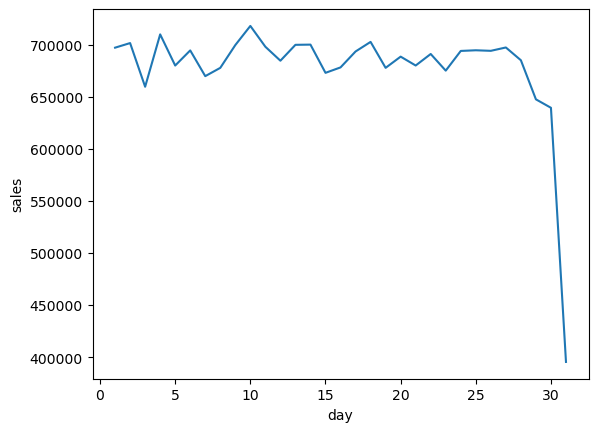

In [43]:
sns.lineplot(x='day', y='sales', data=daily_sales)

**Hourly Sales Trend**

<Axes: xlabel='hour', ylabel='sales'>

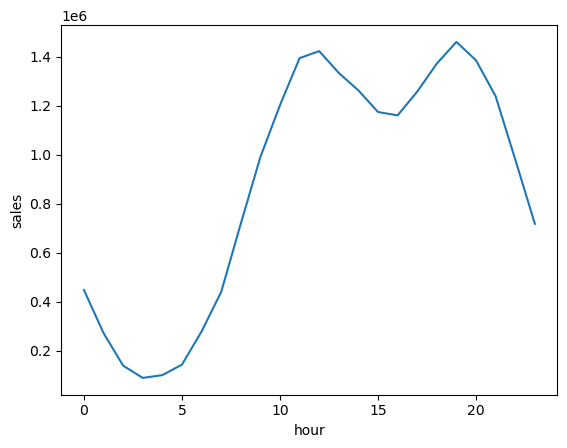

In [45]:
sns.lineplot(x='hour', y='sales', data=hourly_sales)

# Revenue Trends: Year-over-Year Comparison of Sales


## Can you compare sales trends over different years? Is there a growth or decline in revenue year-over-year?

In [48]:
df.loc[:, 'sales'] = df['sales'].astype(int)
year_sales = df.groupby('year')['sales'].sum().reset_index()
print(year_sales)

   year       sales
0  2019  20867408.0
1  2020      5016.0


### Visualization

<Axes: xlabel='year', ylabel='sales'>

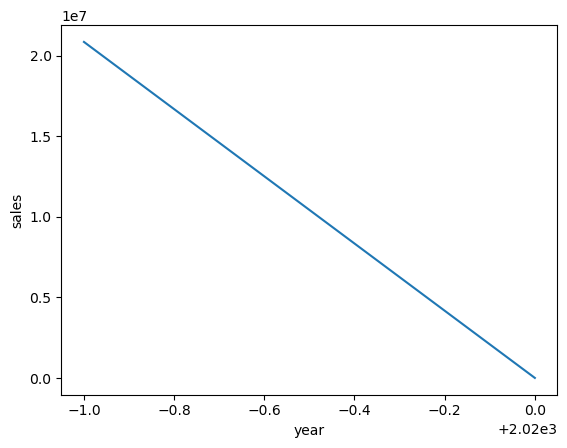

In [50]:
sns.lineplot(x='year', y='sales', data=year_sales)

# Pivot Tables for Insights (Average Sales per Product across Cities)

## Can you create a pivot table to show average sales per product across different cities or months?

In [53]:
pivot_tab = pd.pivot_table(df,values='sales',index='product',columns='city',aggfunc='mean')
pivot_tab.head()

city,Atlanta,Austin,Boston,Dallas,Los Angeles,New York,Portland,San Francisco,Seattle
product,,,,,,,,,
20in Monitor,110.305638,109.964912,109.000000,109.973451,109.672783,109.990991,109.398551,109.775428,109.683230
27in 4K Gaming Monitor,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
27in FHD Monitor,150.029160,150.694915,149.756620,150.810345,149.740132,149.420954,149.569260,149.917176,149.519931
34in Ultrawide Monitor,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
AA Batteries (4-pack),4.281156,4.315888,4.449774,4.341608,4.399087,4.428571,4.397356,4.349398,4.338235


In [54]:
pivot_tab = pd.pivot_table(df,values='sales',index='product',columns='month_name',aggfunc='mean')
pivot_tab.head()

month_name,April,August,December,February,January,July,June,March,May,November,October,September
product,,,,,,,,,,,,
20in Monitor,110.421189,110.279070,109.388007,109.448980,110.534884,110.018519,109.342679,109.681115,109.976331,109.262530,109.257611,110.204380
27in 4K Gaming Monitor,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
27in FHD Monitor,149.613915,150.859504,149.469239,150.273885,149.356295,149.998336,150.604278,149.495868,149.218023,150.904090,149.190355,149.941423
34in Ultrawide Monitor,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
AA Batteries (4-pack),4.470417,4.388357,4.476804,4.441130,4.488910,4.324116,4.436364,4.294258,4.234487,4.327919,4.248214,4.388128


# Sales Behavior: Weekday vs. Weekend Sales Trends

## Do we observe any significant differences in sales on weekdays versus weekends?

In [57]:
df.loc[:,'day_type'] = df['weekday'].apply(lambda x: 'Weekend' if x>=5 else 'Weekday')
weekday_sales= df.groupby('day_type')['sales'].sum().reset_index()

C:\Users\adana\AppData\Local\Temp\ipykernel_15000\2269059247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'day_type'] = df['weekday'].apply(lambda x: 'Weekend' if x>=5 else 'Weekday')


### Visualization

<Axes: xlabel='day_type', ylabel='sales'>

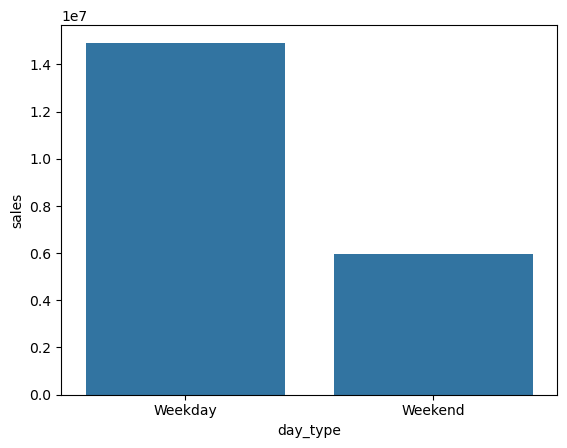

In [59]:
sns.barplot(x='day_type', y='sales', data=weekday_sales)